# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2023
## Домашнее задание 2. Методы нахождения оценок. Бутстреп. Байесовская статистика
### Мягкий дедлайн --- 27 октября 23:59
### Жёсткий дедлайн --- 2 ноября 16:59

Выполняйте задания прямо в ноутбуке. Пожалуйста, не стирайте условия задач.

- Информация о выполнении и курсе в целом есть в чате https://t.me/+IHdLycZDD5g5MDQy.
- По вопросам об условиях задач, требованиям можно писать в чат или https://t.me/vitalii_kondratiuk .
- По организационным вопросам https://t.me/d_pavlov_p

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* собственно кодом,
* Перед ячейками с кодом в случае необходимости пишите, что Вы вычисляете, что ожидаете увидеть и как будете анализировать результат
* После каждого числа или графика пишите анализ: каков результат? Оправдал ли он ожидания? Какие особености Вы увидели? Откуда они взялись?
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

Для красоты графиков можно (и приветствуется) вместо гистограммы использовать ядерную оценку плотности (kernel density estimator): https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

Загрузим необходимый для задачи 2 датасет. Если что-то пошло не так, то просто скачайте файл по ссылке вручную.

In [1]:
from bokeh.plotting import figure
from holoviews.plotting.bokeh.styles import alpha
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

Downloading...
From: https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs
To: C:\Users\natas\PycharmProjects\math_stat_homework\Weibull.csv

  0%|          | 0.00/17.9k [00:00<?, ?B/s]
100%|##########| 17.9k/17.9k [00:00<00:00, 106kB/s]
100%|##########| 17.9k/17.9k [00:00<00:00, 106kB/s]


In [3]:
import pandas as pd
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

**Условие задания**: Великая Ордалия уже почти готова к путешествию, однако враги империи проникли в замок и уничтожили все формулы с оценками из Домашнего задания 1. Можно попытаться восстановить их по памяти, но не лучше ли взамен старых оценок изобрести новые? Помимо этого за две тысячи лет (прошедших с момента первой ордалии до наших дней) точечные оценки значительно устарели и уже не способны отражать реальную суть вещей, поэтому Вам будет предложено попробовать на практике два других подхода: интервальные оценки и байесовские оценки.

В этой практике Вам предложено реализовать несколько подходов к построению оценок и понять, когда какой подход применять.

**Дисклеймер**:
В задачах будет разбиение на пункты, но оцениваться задача будет **целиком**. Можете считать, что выполнение всех пунктов вместе с отсутствием замечаний по полноте анализа/эффективности кода/информативности графиков/т.д. приносит полный балл.

### Задача 1

Прочитайте ещё раз задачу 1 домашки 1. Вы сравнивали оценки исходя из визуальных свойств их графиков. Пришло время начать сравнивать оценки строго!

Напомним, что в задаче речь шла про оценки параметра $\theta$ распределения $U[0, \theta]$: $2\overline{X}$, $\frac{n+1}{n} X_{(n)}$, $(n+1)X_{(1)}$, $\overline{X} + X_{(n)}/ 2$ и $X_{(1)}+X_{(n)}$. Как и ранее, зафиксируем какое-то конкретное значение параметра, скажем, $\theta = 1$.

Постройте плотности для первых трёх оценок. Настойчиво просим предоставлять решение в виде теха, но если у вас лапки, то можете прикрепить фото с хорошо разборчивым почерком.

Решение и ответ:
1. Для первой оценки плотность разрешили на считать (писали в чате).
2. Посчитаю плотность для $\frac{n+1}{n} X_{(n)}$. Для этого воспользуюсь функцией распределения выличины $\frac{n+1}{n} X_{(n)}$: $F_{\frac{n+1}{n}X_{(n)}} (t)$. Распишу по определению и затем перейду к произведению вероятностей. Найти функцию распределения $F_{\frac{n+1}{n}X_{(n)}}(t)$ означает найти вероятность того, что $\frac{n+1}{n} X_{(n)} \leq t$. Перепишу это неравенство относительно $X_{(n)}$: $P(X_{(n)} \leq \frac{n}{n+1} t)$. Теперь надо выразить вероятность $P\left(X_{(n)} \leq \frac{n}{n+1} t\right)$ через вероятность того, что каждый $X_i$ не превышает $\frac{n}{n+1} t$: $\prod_{i=1}^n P(X_i \leq \frac{n}{n+1} t)$. Так как $X_i \sim U(0, \theta)$, мы знаем, что $P(X_i \leq x) = \frac{x}{\theta}$ для $x \in [0, \theta]$: $\prod_{i=1}^n P(X_i \leq \frac{n}{n+1} t) = \frac{ (\frac{n}{n+1} t)^n }{\theta^n}.$ Но это выражение справедливо, только когда $\frac{n}{n+1} t \leq \theta$, то есть $t \leq \frac{n+1}{n} \theta$. Поэтому: $ \prod_{i=1}^n P(X_i \leq \frac{n}{n+1} t) = \frac{ (\frac{n}{n+1} t)^n }{\theta^n} I_{[0, \frac{n+1}{n} \theta]} + 1 \cdot I_{( \frac{n+1}{n} \theta, +\infty)}$.
Получаю, что плотность этой оценки равна: $p_{\frac{n+1}{n}X_{(n)}} (t) = \frac{n^{n+1}}{(n+1)^n} \frac{t^{n - 1}}{\theta^n} I_{[0, \frac{n+1}{n} \theta]}$.
3. Посчитаю плотность оценки $(n+1)X_{(1)}$.
Вначале для функции распределения $F_{(n+1)X_{(1)}}(t)$ найду вероятность того, что $(n+1)X_{(1)} \leq t$:$F_{(n+1)X_{(1)}}(t) = P((n+1)X_{(1)} \leq t) = P\left(X_{(1)} \leq \frac{t}{n+1}\right).$
Теперь, как в прошлом пункте, надо выразить вероятность $P\left(X_{(1)} \leq \frac{t}{n+1}\right)$ через вероятность того, что все $X_i$ больше $\frac{t}{n+1}$:
$P\left(X_{(1)} \leq \frac{t}{n+1}\right) = 1 - P\left(X_{(1)} > \frac{t}{n+1}\right) = 1 - \prod_{i=1}^n P\left(X_i > \frac{t}{n+1}\right).$ 
Так как $X_i \sim U(0, \theta)$, вероятность того, что $X_i > x$, равна $1 - \frac{x}{\theta}$ для $x \in [0, \theta]$. Подставлю это:
$1 - \prod_{i=1}^n \left(1 - \frac{\frac{t}{n+1}}{\theta}\right) = 1 - \left(1 - \frac{t}{(n+1) \theta}\right)^n.$
нужно снова отметить, что выражение справедливо, если $\frac{t}{n+1} \leq \theta$, то есть $t \leq (n+1) \theta$. Поэтому функция распределения $F_{(n+1)X_{(1)}}(t)$ принимает вид:$F_{(n+1)X_{(1)}}(t) = 1 - \left(1 - \frac{t}{(n+1) \theta}\right)^n \cdot I_{[0, (n+1) \theta]} + 1 \cdot I_{((n+1) \theta, +\infty)}.$
Теперь нужно найти плотность, чтобы это сделать, нужно продифференцировать $F_{(n+1)X_{(1)}}(t)$ по $t$ на интервале $[0, (n+1) \theta]$:
$p_{(n+1)X_{(1)}}(t) = \frac{d}{dt} \left(1 - \left(1 - \frac{t}{(n+1) \theta}\right)^n\right) = \frac{n}{(n+1) \theta} \left(1 - \frac{t}{(n+1) \theta}\right)^{n-1} \cdot I_{[0, (n+1) \theta]}.$
И мы получаем, что плотность $p_{(n+1)X_{(1)}}(t)$ для оценки $(n+1)X_{(1)}$ равна
$p_{(n+1)X_{(1)}}(t) = \frac{n}{(n + 1) \theta} \left(1 - \frac{t}{(n + 1) \theta}\right)^{n-1} I_{[0, (n +1) \theta]}.$




Для квадратичной функции потерь посчитайте аналитически (для первых трёх оценок) и численно (для каждой оценки) риск для выборки из $N$ элементов. Начните с $N=1000$ и уменьшите его, если вычисления будут неподъемными. Для численного вычисления интеграла можно использовать scipy.integrate.quad или метод Монте-Карло.

В прошлом дз я выводила, что все три оценки несмещенные, поэтому сейчас вычисление риска сводится к вычислению дисперсии, так как если оценка несмещенная, то математическое ожидание квадрата разности оценки и параметра равно дисперсии оценки. Пользуясь этим, найду риски оценок:
1. Нужно найти дисперсию оценки $2\overline{X}$. Воспользуюсь свойством дисперсии: $D(2\overline{X}) = \frac{4}{n} D(X) = \frac{4}{n} \frac{\theta^2}{12} = \frac{\theta^2}{3n}$. То есть риск оценки равен: $\frac{\theta^2}{3n}$. Подставляя $\theta = 1$, получаем риск оценки $2\overline{X}$ равен $\frac{1}{3n}$.
2. Снову надо найти дисперсию оценки, воспользуюсь тем, что $D(X) = EX^2 - (EX)^2$. Буду сразу подставлять значение $\theta = 1$, чтобы было приятнее считать интегралы: 
$D\left(\frac{n+1}{n}X_{(n)}\right) = \frac{n^{n+1}}{(n+1)^n} \int_{0}^{\frac{n+1}{n}} x^{n + 1} \, dx  - 1^2 = \frac{n^{n+1}}{(n+2)(n+1)^n} \frac{(n+1)^{n+2}}{n^{n+2}}  - 1 = \frac{(n + 1)^2}{n(n+2)} - 1 = \frac{1}{n(n+2)}$. Таким образом, риск оценки $\frac{n+1}{n}X_{(n)}$ равен:$ \frac{1}{n(n+2)}$.
3. И снова нужно найти дисперсию. $D((n+1)X_{(1)}) = \frac{n}{n + 1} \int_{0}^{n+1} x^2 \left(1 - \frac{x}{n+1}\right)^{n-1} dx - 1$. Сделаю замену в интеграле $t = \frac{x}{n+1}$, чтобы использовать бета-функцию: $= n(n+1) \int_{0}^{1} t^2 (1 - t)^{n-1} dt - 1 = n(n+1) B(3, n) - 1$. Использую представление бета-функции через гамма-функцию: $= \frac{n (n+1) \Gamma(3) \Gamma(n)}{\Gamma(3 + n)} - 1$. В итоге, получаю: $= \frac{2n + 2}{n + 2} - 1 = \frac{n}{n+2}$. Значит, риск оценки $(n+1)X_{(1)}$ равен: $\frac{n}{n+2}$ 

In [72]:
import numpy as np
from scipy.stats import uniform
from IPython.display import display, Math

theta = 1
N = 1000  
num_simulations = 10000  

def estimator_1(sample):
    return 2 * np.mean(sample)

def estimator_2(sample):
    n = len(sample)
    return (n + 1) / n * np.max(sample)

def estimator_3(sample):
    n = len(sample)
    return (n + 1) * np.min(sample)

def estimator_4(sample):
    return np.mean(sample) + np.max(sample) / 2

def estimator_5(sample):
    return np.min(sample) + np.max(sample)

risks = np.zeros(5)

for i in range(num_simulations):
    sample = uniform.rvs(scale=theta, size=N)
    risks[0] += (estimator_1(sample) - theta) ** 2
    risks[1] += (estimator_2(sample) - theta) ** 2
    risks[2] += (estimator_3(sample) - theta) ** 2
    risks[3] += (estimator_4(sample) - theta) ** 2
    risks[4] += (estimator_5(sample) - theta) ** 2

risks /= num_simulations

display(Math(r"\text{Численный риск для каждой оценки:}"))
display(Math(r"2\overline{X}: " + f"{risks[0]:.5e}"))
display(Math(r"\frac{{n+1}}{{n}} X_{{(n)}}: " + f"{risks[1]:.5e}"))
display(Math(r"(n+1) X_{{(1)}}: " + f"{risks[2]:.5e}"))
display(Math(r"\overline{X} + \frac{{X_{{(n)}}}}{2}: " + f"{risks[3]:.5e}"))
display(Math(r"X_{{(1)}} + X_{{(n)}}: " + f"{risks[4]:.5e}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Постройте распределения оценок для одного $\theta$ на одном графике

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

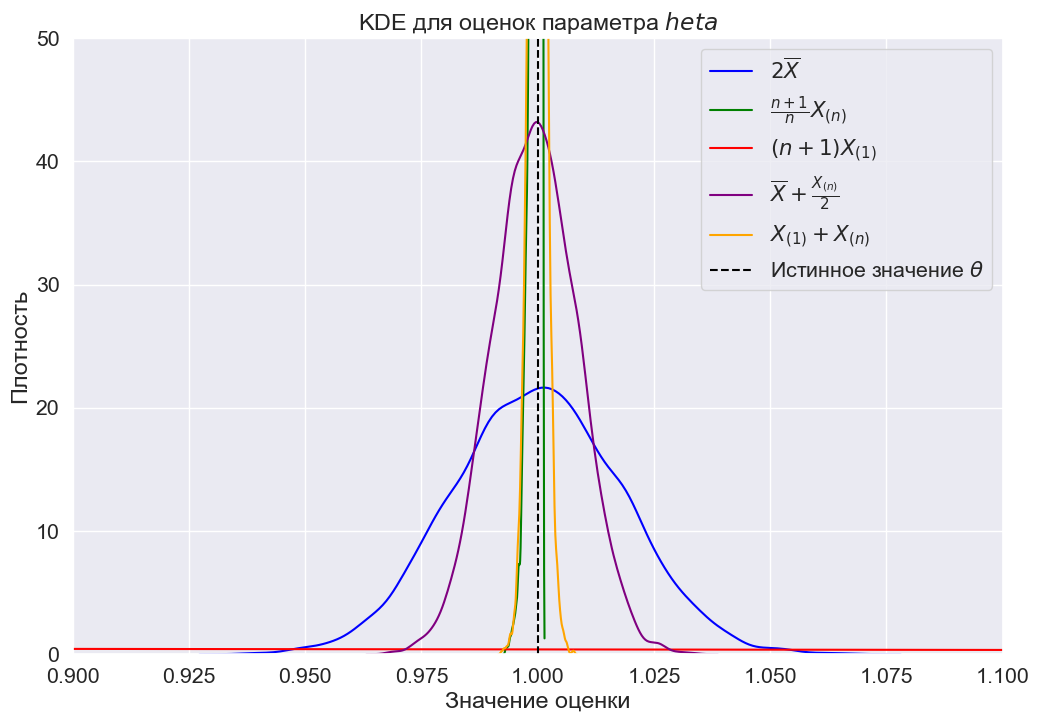

In [79]:
estimates_1 = []
estimates_2 = []
estimates_3 = []
estimates_4 = []
estimates_5 = []

for i in range(num_simulations):
    sample = uniform.rvs(scale=theta, size=N) 
    estimates_1.append(estimator_1(sample))
    estimates_2.append(estimator_2(sample))
    estimates_3.append(estimator_3(sample))
    estimates_4.append(estimator_4(sample))
    estimates_5.append(estimator_5(sample))

plt.figure(figsize=(12, 8))
sns.kdeplot(estimates_1, label=r'$2\overline{X}$', color='blue')
sns.kdeplot(estimates_2, label=r'$\frac{n+1}{n} X_{(n)}$', color='green')
sns.kdeplot(estimates_3, label=r'$(n+1) X_{(1)}$', color='red')
sns.kdeplot(estimates_4, label=r'$\overline{X} + \frac{X_{(n)}}{2}$', color='purple')
sns.kdeplot(estimates_5, label=r'$X_{(1)} + X_{(n)}$', color='orange')

plt.axvline(theta, color='black', linestyle='--', label=r'Истинное значение $\theta$')

plt.xlabel('Значение оценки')
plt.ylabel('Плотность')
plt.title(r'KDE для оценок параметра $\theta$')
plt.xlim(0.9, 1.1)
plt.ylim(0, 50)
plt.legend()
plt.show()

Вспомните свой вывод из задачи 1. Согласуется ли выбор "лучшей" оценки с понятием квадратичного риска? Почему?

Ответ: В прошлом дз в задаче 1 я долго сомневалась между $\frac{n+1}{n} X_{(n)}$, $\overline{X} + X_{(n)}/ 2$ и $X_{(1)}+X_{(n)}$. В итоге я остановилась на $X_{(1)}+X_{(n)}$, но сейчас вижу (и теоретически можно доказать, что самый минимальный риск у $\frac{ n + 1 }{n} X_{(n)}$) что минимальный риск именно у оценки $\frac{ n + 1 }{n} X_{(n)}$, поэтому этц оуенку и нужно считать лучшей. 

Вспомните и напишите формулировку теоремы Рао-Крамера. Посчитайте, какую нижнюю оценку риска предлагает эта теорема. Сравните её численное значение с посчитанным Вами риском. Сделайте выводы.

Ответ: Я взяла формулировку из методички: 

Теорема 4.1 (неравенство Рао-Крамера)

Рассматривается выборка для параметрической модели, на которую наложены условия регулярности. Пусть $\theta^*$ — несмещённая оценка $\tau(\theta)$. Тогда для любого $\theta \in \Theta$
$D_\theta \theta^* \geq \frac{(\tau'(\theta))^2}{n i(\theta)},$
где $D_\theta \theta^*$ обозначает дисперсию оценки $\theta^*$, а $i(\theta)$ — информация Фишера.

Для данной задачи $\tau(\theta) = \theta $, значит, $ (\tau'(\theta))^2 = 1$. $L_{\theta}(X) = \ln \frac{1}{\theta} I_{X \in [0, \theta]} = -\ln(\theta) I_{X \in [0, \theta]} $, значит, $u_{\theta}(X) = -\frac{1}{\theta} I_{X \in [0, \theta]}$. Найдем информацию Фишера: $i_{\theta}(X) = E_{\theta}(u_{\theta}(X))^2 = \int_{0}^{\theta} \frac{1}{\theta^3} \, dx = \frac{1}{\theta^2} = 1.$ Получаем, что $D_{\theta} \theta^* \geq \frac{1}{n}$.

Для данной задачи n=1000, но при этом значения риска дял все оценок меньше 1000, то есть неравенство не выполняется. Но вообще, хочется заметить, что теорема Рао Крамера тут вообще не применима, так как не выполняются условия регулярности (а они есть в условии теоремы). Например, зависимость распределения от $\theta$.

Численно посчитайте риск для функции потерь $l(x, y) = |x - y|$ и для какой-то другой осмысленной предложенной Вами функцией потерь. Будет ли порядок качества на оценках таким же, как и для квадратичного подхода?

In [86]:
theta = 1
N = 1000  
num_simulations = 10000  

def absolute_loss(estimate, theta):
    return np.abs(estimate - theta)

def exponential_loss(estimate, theta):
    return np.exp(np.abs(estimate - theta)) - 1

def calculate_risks(loss_function):
    risks = np.zeros(5)
    for _ in range(num_simulations):
        sample = uniform.rvs(scale=theta, size=N)
        risks[0] += loss_function(estimator_1(sample), theta)
        risks[1] += loss_function(estimator_2(sample), theta)
        risks[2] += loss_function(estimator_3(sample), theta)
        risks[3] += loss_function(estimator_4(sample), theta)
        risks[4] += loss_function(estimator_5(sample), theta)
    return risks / num_simulations

absolute_risks = calculate_risks(absolute_loss)

exponential_risks = calculate_risks(exponential_loss)

display(Math(r"\text{Численный риск с абсолютной функцией потерь для каждой оценки:}"))
display(Math(r"2\overline{X}: " + f"{absolute_risks[0]:.5e}"))
display(Math(r"\frac{{n+1}}{{n}} X_{{(n)}}: " + f"{absolute_risks[1]:.5e}"))
display(Math(r"(n+1) X_{{(1)}}: " + f"{absolute_risks[2]:.5e}"))
display(Math(r"\overline{X} + \frac{{X_{{(n)}}}}{2}: " + f"{absolute_risks[3]:.5e}"))
display(Math(r"X_{{(1)}} + X_{{(n)}}: " + f"{absolute_risks[4]:.5e}"))

display(Math(r"\text{Численный риск с экспоненциальной функцией потерь для каждой оценки:}"))
display(Math(r"2\overline{X}: " + f"{exponential_risks[0]:.5e}"))
display(Math(r"\frac{{n+1}}{{n}} X_{{(n)}}: " + f"{exponential_risks[1]:.5e}"))
display(Math(r"(n+1) X_{{(1)}}: " + f"{exponential_risks[2]:.5e}"))
display(Math(r"\overline{X} + \frac{{X_{{(n)}}}}{2}: " + f"{exponential_risks[3]:.5e}"))
display(Math(r"X_{{(1)}} + X_{{(n)}}: " + f"{exponential_risks[4]:.5e}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Порядкаи сходятся везде, кроме второй оценки. Я использовала экспоненциальную функцию потерь.

Вернёмся к вадратичной функции потерь. Пусть теперь сам параметр $\theta$ приходит из распределения $\mathsf Q$ с плотностью $q(x) = xI[0, 1]$. Посчитайте численно байесовский риск каждой оценки. Сравните оценки в байесовском подходе. Остался ли порядок прежним?

Подберите такую плотность на $\theta$, при котором порядок сравнения может измениться или объясните, почему это невозможно. Если Вы подобрали плотности, приведите пример постановки задачи, при которой Ваша плотность имеет практический смысл.

*Указание:* не пытайтесь обогнать оценку-максимум по качеству, но может другие две оценки можно заставить сравниваться по-разному для разных плотностей.

Сделайте вывод о сравнении оценок и теореме Рао-Крамера

## Задача 2

Имперские банки каждую ночь подсчитывают баланс ресурсов Ордалии по сравнению с вчерашней ночью. За день приходят как новые ресурсы, так и потребляются уже имеющиеся. Как и у любого другого банка, если обозначить $X^1$ – максимальное значение баланса за день, $X^2$ – значение баланса в полночь, то $X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр формы. В файле Weibull.csv находятся соответствующие измерения.

Наша задача состоит в том, чтобы оценить параметр формы.

Формальное условие: для распределения Вейбулла, функция распределения которого предложена выше, предлагается найти оценку параметра $\gamma$.

In [20]:
weibull_sample = np.loadtxt("Weibull.csv")

1. Постройте гистограмму выборки. Не забудьте подобрать `xlim`, `ylim` и параметр `bins`, чтобы гистограмма была информативна.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


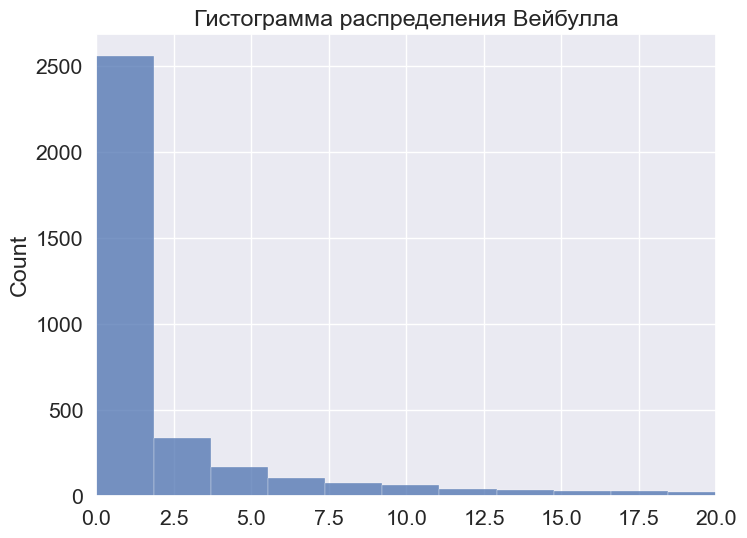

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(weibull_sample, bins=200)
plt.xlim((0, 20))
plt.title('Гистограмма распределения Вейбулла')
plt.show()

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$


Однако здесь мы сталкиваемся с проблемой: в нашей выборке есть нули. А логарифм нуля, как известно, не определен. Мы предлагаем вам придумать решение этой проблемы и обосновать его применимость. Ситуация, когда статистическая модель не описывает какие-то артефакты в данных (как, например, нули в этой задаче) для практики типична, и с ней приходится что-то делать.

Ответьте на два вопроса:

а. Могут ли нули появляться если честно семплировать из распределения Вейбулла?

б. Зная плотность распределения и то, что компьютерная точность неабсолютна, откуда нули всё-таки взялись, учитывая то, что авторы задания сэмплировали выборку из распределения Вейбулла?

Ответ:
а. Можно заметить, что распределение непрерывное, и определено для x>0, значит вероятность того, что x=0, нулевая, поэтому можно считать, что нули появиться не могут. 

б. Нули видимо взялись при округлении (тем более что данные в выборке имеют точность 2 знака). 

Чтобы избавиться от 0 я рассмотрю два способа:
1. Можно попробовать вместо нулей вставить маленькие числа (я буду вставлять 1e-6)
2. Можно вставить вместо нулей равномерную выборку такого же размера с границей, равной половине наименьшего ненулевого значения (потому что видимо округление до сотых). Я имею в виду попробовать приблизить функцию распределения прямой (как в тейлоре).

2. Посчитайте эмпирическую функцию распределения и
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки.

**Постройте** график (`plt.scatter`) от (y', x') для Ваших способов борьбы с нулями разными цветами.
Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла.

In [76]:
small_value = 1e-6
weibull_fixed = np.where(weibull_sample == 0, small_value, weibull_sample)

min_nonzero = np.min(weibull_sample[weibull_sample > 0])
random_values = np.random.uniform(0, min_nonzero / 2, size=weibull_sample.shape)
weibull_random = np.where(weibull_sample == 0, random_values, weibull_sample)

In [77]:
from statsmodels.distributions.empirical_distribution import ECDF 
import numpy as np
import matplotlib.pyplot as plt

ecdf = ECDF(weibull_sample)
ecdf_weibull_fixed = ECDF(weibull_fixed)
ecdf_weibull_random = ECDF(weibull_random)

grid = np.logspace(-3, 1, 500)
y_weibull_sample = np.log(-np.log(1 - ecdf(grid)))
y_weibull_fixed = np.log(-np.log(1 - ecdf_weibull_fixed(grid)))
y_weibull_random = np.log(-np.log(1 - ecdf_weibull_random(grid)))
x_weibull_sample = np.log(grid)

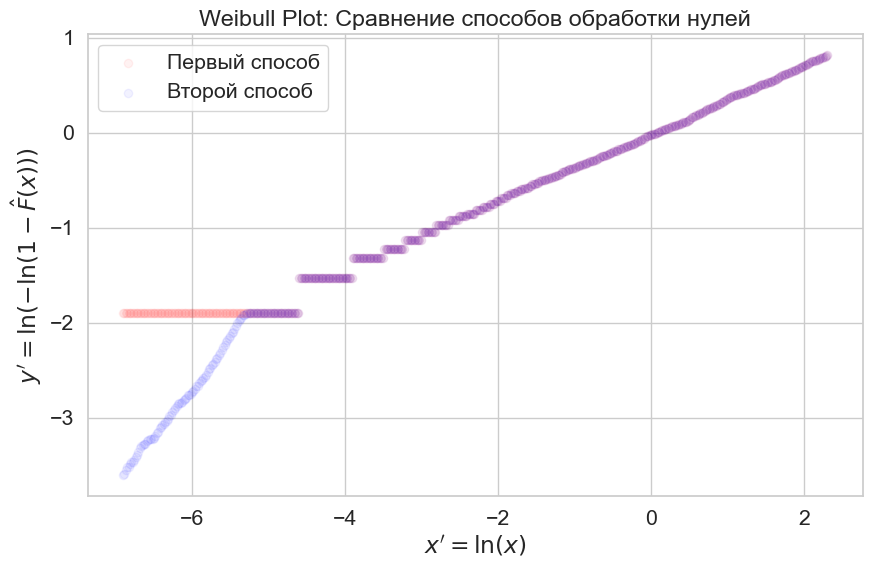

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(x_weibull_sample , y_weibull_fixed, alpha=0.05, label='Первый способ', color='red')
plt.scatter(x_weibull_sample, y_weibull_random ,  alpha=0.05, label='Второй способ', color='blue')
plt.ylabel(r"$y' = \ln(-\ln(1 - \hat{F}(x)))$")
plt.xlabel(r"$x' = \ln(x)$")
plt.title("Weibull Plot: Сравнение способов обработки нулей")
plt.legend()
plt.show()

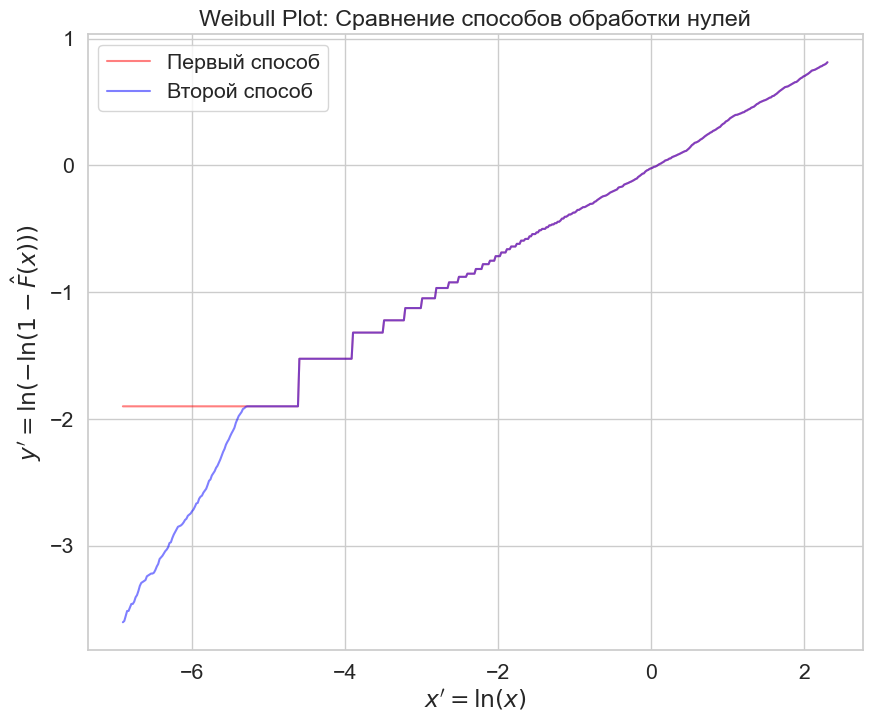

In [79]:
plt.figure(figsize=(10, 8))
plt.plot(x_weibull_sample, y_weibull_fixed, alpha = 0.5, label='Первый способ', color='red')
plt.plot(x_weibull_sample, y_weibull_random, alpha = 0.5, label='Второй способ', color='blue')
plt.xlabel(r"$x' = \ln(x)$")
plt.ylabel(r"$y' = \ln(-\ln(1 - \hat{F}(x)))$")
plt.title("Weibull Plot: Сравнение способов обработки нулей")
plt.legend()
plt.show()


Сделайте вывод. Какой способ вам кажется более правильным и почему?

**Вывод:** Я изобразила два графика, но нагладянее мне показался второй, с ним я и буду работать. 

Вообще, оба способа так себе. В первом способе оценка очень заниженная, кажется, первый способ хуже второго отображает теоретическую форму распределения. Второй способ лучше, но здесь наклон линии не совпадает с основной частью графика. Такая "ступенчатая структура" возникла как раз из-за замены нулей. Но я все-таки буду использовать в дальнейшем второй способ.

3. Оцените параметр формы методом максимального правдоподобия
* по
первым 4 годам;
* по всей выборке.

Мы предполагаем, что Вы будете производить максимизацию по сетке --- для некоторого множества возможных параметров постройте сетку с некоторым шагом (для определённости возьмите шаг равный $10^{-3}$) и выберите лучший параметр на этой сетке. Известно, что $\log_{10}\gamma \in [-2, 2].$

Однако, если Вы хорошо поняли курс оптимизации, то можете написать оптимизатор, который находит максимум сам. Задачу можно переформулировать, чтобы ответ не изменился, а оптимизация шла быстрее. За хорошо сформулированную оптимизационную задачу и реализацию мы добавим 5 бонусных баллов.

Решение: Чтобы найти плотность вероятности, нужно продифференцировать $ F(x) $ по x:
$f(x) = \frac{d}{dx} \left( 1 - e^{-x^{\gamma}} \right)$.
Тогда получаем, что плотность вероятности для распределения Вейбулла равна $f(x) = \gamma x^{\gamma - 1} e^{-x^\gamma} \quad \text{для } x > 0$.

Тогда функция правдоподобия для $X = \{x_1, x_2, \dots, x_n\} $ будет равна
$L = \prod_{i=1}^n \gamma x_i^{\gamma - 1} e^{-x_i^\gamma}$.
Но удобнее взять логарифм правдоподобия:
$\ln L = \sum_{i=1}^n \left( \ln \gamma + (\gamma - 1) \ln x_i - x_i^\gamma \right)$

И вот как раз $\ln L$ и надо максимизировать.

Я буду использовать демпфированный метод Ньютона (ниже отрывок из задания по методам оптимизации). 

**Псевдокод алгоритма**

_Инициализация:_

Величина шага $\{ \gamma_k \}_{k=0} > 0$, стартовая точка $ x^0 \in \mathbb{R}^d $, количество итераций $ K $

$k \hspace{-1em}$ _--ая итерация:_
1. Подсчитать направление спуска $$ d_k = \left( \nabla^2 f(x^k) \right)^{-1} \nabla f(x_k)  $$
2. Сделать шаг алгоритма $$ x^{k+1} = x^k - \gamma_k d_k $$

Поясню, что params['gamma'] это функция, определяющая шаг.

В данном случае функция для минимизации - это отрицательный логарифм правдоподобия. Найду градиент и гессиан для этой функции.
$\nabla f = \frac{d}{d\gamma} -\ln L(\gamma) = -\sum_{i=1}^n \left( \frac{1}{\gamma} + \ln x_i - x_i^\gamma \ln x_i \right)$

$\nabla^2 f = \frac{d^2}{d\gamma^2} -\ln L(\gamma) = -\sum_{i=1}^n \left( -\frac{1}{\gamma^2} - x_i^\gamma (\ln x_i)^2 \right)$

In [26]:
import numpy as np
from tqdm.autonotebook import trange

def DumpedNewton(grad, hess, criterion, x_0, eps, max_iter, **params):
    errors = [] 
    x_k = np.copy(x_0)
    err_x_0 = criterion(x_k)  
    errors.append(criterion(x_k) / err_x_0)

    for k in trange(max_iter):
        d_k = grad(x_k) / hess(x_k) 
        x_k = x_k - params['gamma'](k) * d_k
        
        errors.append(criterion(x_k) / err_x_0)
        if errors[-1] < eps:
            break
            
    return x_k, errors

In [35]:
sample_4_years = weibull_random[:365 * 4] 
sample_all = weibull_random

def negative_log_likelihood(gamma, data):
    return -np.sum(np.log(gamma) + (gamma - 1) * np.log(data) - data ** gamma)

def grad(gamma, data):
    return -np.sum(1 / gamma + np.log(data) - data ** gamma * np.log(data))

def hess(gamma, data):
    return -np.sum(-1 / gamma**2 - data ** gamma * (np.log(data))**2)

def gamma_step(k):
    return 1.0 / (1.0 + 0.1 * k)  

initial_gamma = np.array([1.0]) 
eps = 1e-16
max_iter = 1000

best_gamma_4_years, errors_4_years = DumpedNewton(grad=lambda gamma: grad(gamma, sample_4_years), hess=lambda gamma: hess(gamma, sample_4_years), criterion=lambda gamma: negative_log_likelihood(gamma, sample_4_years), x_0=initial_gamma, eps=eps, max_iter=max_iter, gamma=gamma_step)

best_gamma_all, errors_all = DumpedNewton(grad=lambda gamma: grad(gamma, sample_all), hess=lambda gamma: hess(gamma, sample_all), criterion=lambda gamma: negative_log_likelihood(gamma, sample_all), x_0=initial_gamma, eps=eps, max_iter=max_iter, gamma=gamma_step)

print(f"Оценка параметра формы по первым 4 годам: {best_gamma_4_years[0]:.10}")
print(f"Оценка параметра формы по всей выборке: {best_gamma_all[0]:.10}")


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Оценка параметра формы по первым 4 годам: 0.3825094743
Оценка параметра формы по всей выборке: 0.3760873327


Найдите в библиотеке `scipy.stats` класс, отвечающий за данное семейство распределений (будьте аккуратны, внимательно читайте документацию!), и изучите его метод `fit`. Как он находит оценку параметра? Примените эту функцию к нашим данным и сравните полученные результаты с результатами выше.

*Замечание.* Обратите внимание, для чего именно сей метод находит оценку? Сделайте так, чтобы он возвращал оценку непосредственно для интересующего нас параметра.

In [36]:
print(f'Оценка по 4 годам: {sps.weibull_min.fit(weibull_random[:365 * 4], fscale=1, floc=0)[0]:.10}')
print(f'Оценка по всем элементам: {sps.weibull_min.fit(weibull_random, fscale=1, floc=0)[0]:.10}')

Оценка по 4 годам: 0.3825346442
Оценка по всем элементам: 0.3760875519


4. Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$) для того метода, который вам кажется более правильным. Хорошо ли линии соответствуют выборке? Как вы думаете, почему?

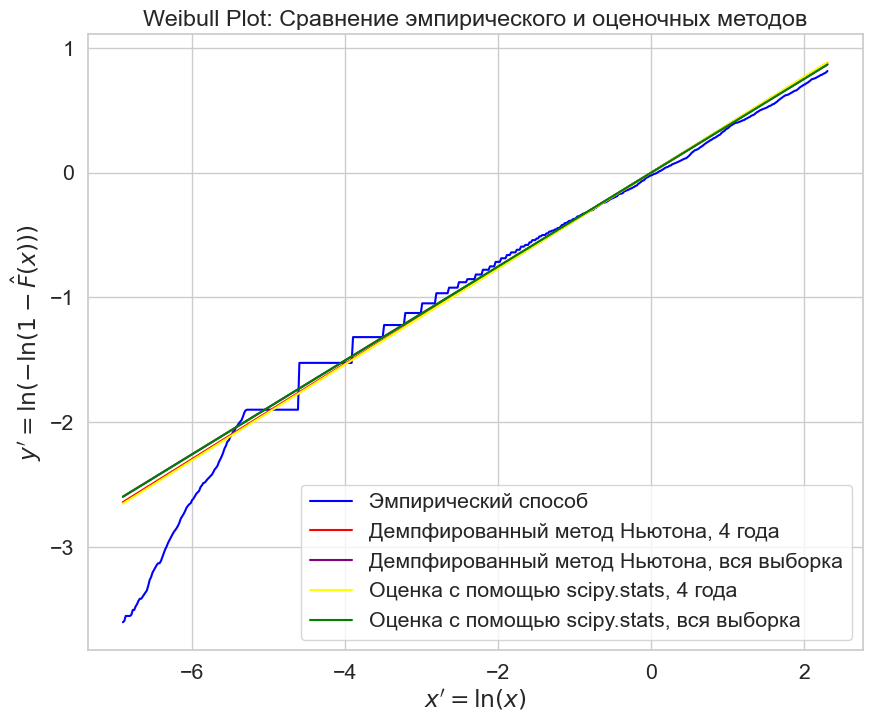

In [59]:
plt.figure(figsize=(10, 8))
plt.plot(x_weibull_sample, y_weibull_random, label='Эмпирический способ', color='blue')
plt.plot(x_weibull_sample, best_gamma_4_years[0] * x_weibull_sample, label='Демпфированный метод Ньютона, 4 года', color='red')
plt.plot(x_weibull_sample, best_gamma_all[0] * x_weibull_sample, label='Демпфированный метод Ньютона, вся выборка', color='purple')
plt.plot(x_weibull_sample, sps.weibull_min.fit(weibull_random[:365 * 4], fscale=1, floc=0)[0] * x_weibull_sample, label='Оценка с помощью scipy.stats, 4 года', color='yellow')
plt.plot(x_weibull_sample, sps.weibull_min.fit(weibull_random, fscale=1, floc=0)[0] * x_weibull_sample, label='Оценка с помощью scipy.stats, вся выборка', color='green')
plt.xlabel(r"$x' = \ln(x)$")
plt.ylabel(r"$y' = \ln(-\ln(1 - \hat{F}(x)))$")
plt.title("Weibull Plot: Сравнение эмпирического и оценочных методов")
plt.legend()
plt.show()

**Вывод** При больших иксах оценки достаточно хорошо приближают функцию от выборки, так как при больших иксах не возникает проблем с обработкой нулей. Причем достаточно хороши обе оценки - и демпфированный метод Ньютона, и оценка с использованием библиотеки scipy.stats. Как я уже писала ранее, "ступенчатая структура" при малых иксах связана с заменой нулей. 


## Задача 3

Хорошим методом получения аналитических оценок является метод моментов.

1. Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**, см. [Википедию](https://en.wikipedia.org/wiki/Gamma_distribution)), $\theta = 3$ для всех распределений $(N = 1000).$ Посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Промоделируйте полученные оценки для разных размеров выборки $n < N$ и изучите их скорости сходимости. На графике отразите истинный параметр. Можете построить отдельный график модуля/квадрата разности оценки и параметра (риск) для какой-то выборке и посмотреть, как быстро риск сходится к нулю.

In [4]:
N = 1000
theta = 3
norm_sample = sps.norm(scale=np.sqrt(theta)).rvs(size=N)
uniform_sample = sps.uniform(loc=0, scale=theta).rvs(size=N)
gamma_sample = sps.gamma(a=1, scale=theta).rvs(size=N)

Решение (вывод метода моментов для каждого случая): 
1. Нормальное распределение $\mathit{N}(0, \theta)$

Возьмем пробную функцию $g(x) = x$. Получаем $E_{\theta}X_1 = 0$. Тогда возьмум пробную функцию $g(x) = x^2$. Получаем $E_{\theta}X^2_1 = D_{\theta}X_1 + E_{\theta}^2X_1 = \theta + 0 = \theta$. То есть $\hat{\theta} = \frac{1}{n} \sum_{i=1}^n X_i^2$

2. Равномерное распределение $\mathit{U}(0, \theta)$

Возьмем пробную функцию $g(x) = x$. Получаем $E_{\theta}X_1 = \frac{\theta}{2}$. То есть $\hat{\theta} = 2 \frac{1}{n}\sum_{i=1}^n X_i$.

3. Гамма-распределение $\Gamma(1, \theta)$

Возьмем пробную функцию $g(x) = x$. Получаем $E_{\theta}X_1 = \theta$. Значит, $\hat{\theta} = \frac{1}{n}\sum_{i=1}^n X_i$.

Ниже я промоделирую полученные оценки для разных размеров выборки $n < N$ и изучу их скорости сходимости.


C:\Users\natas\AppData\Local\Temp\ipykernel_15044\4182471507.py:6: RuntimeWarning: invalid value encountered in divide
  cumulative_var = np.cumsum((data - np.cumsum(data) / (1 + np.arange(N)))**2) / (np.arange(1, N + 1) - 1)


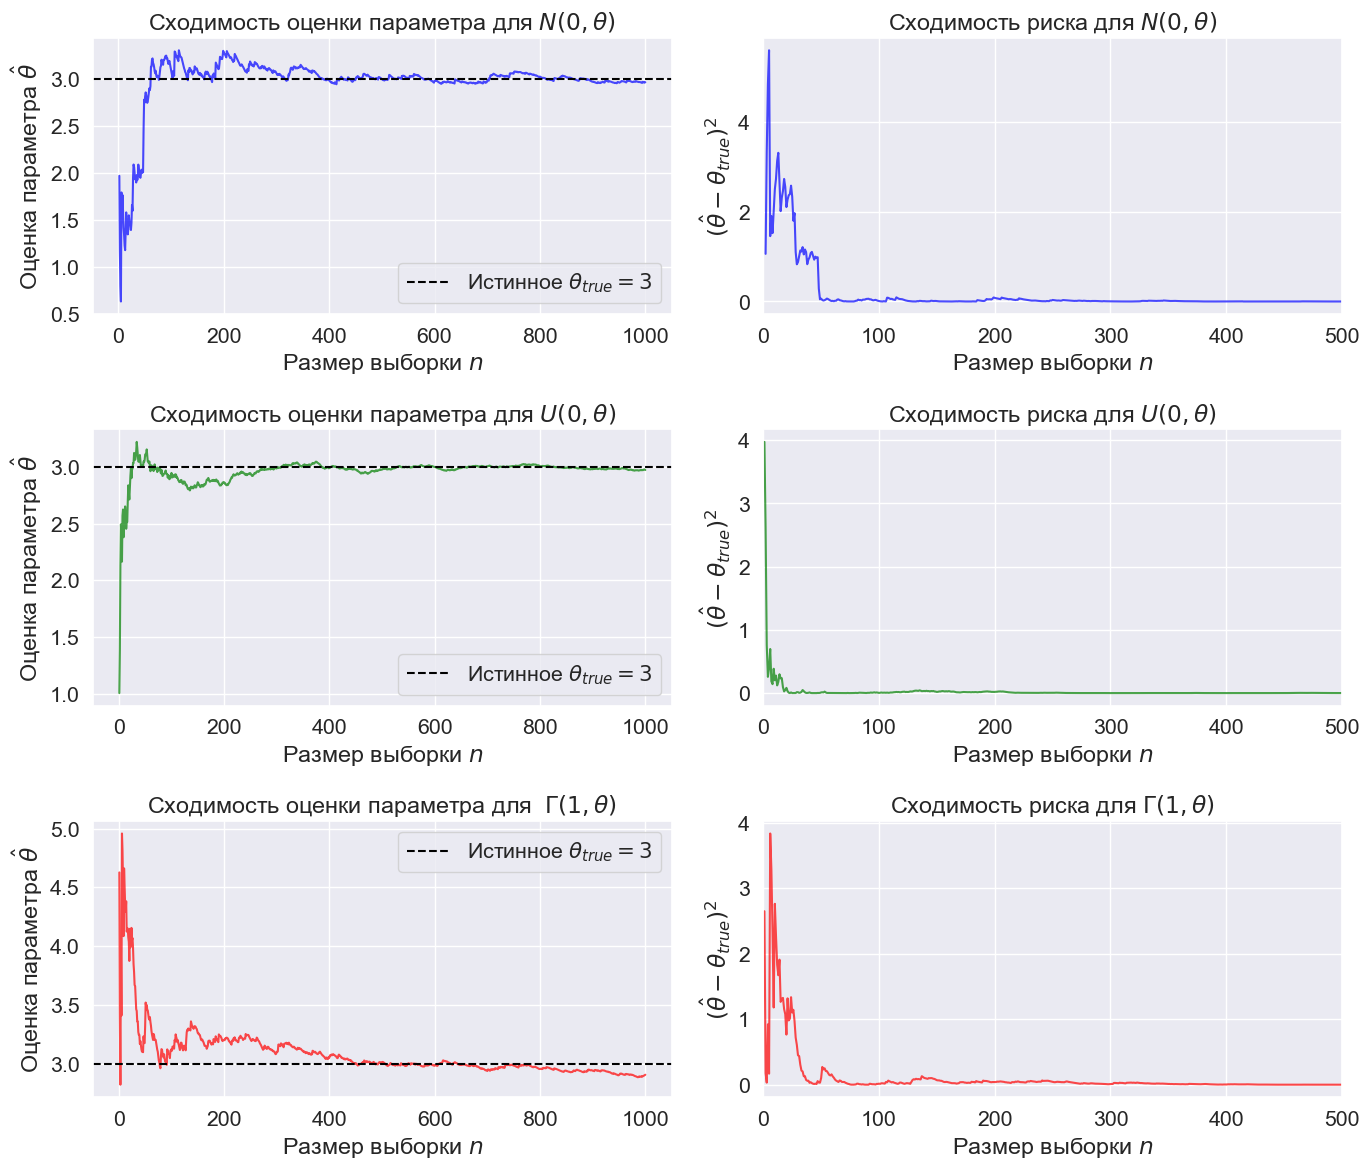

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

def moment_estimator_normal(data):
    cumulative_var = np.cumsum((data - np.cumsum(data) / (1 + np.arange(N)))**2) / (np.arange(1, N + 1) - 1)
    return cumulative_var

def moment_estimator_uniform(data):
    cumulative_mean = np.cumsum(data) / np.arange(1, N + 1)
    return 2 * cumulative_mean

def moment_estimator_gamma(data):
    cumulative_mean = np.cumsum(data) / np.arange(1, N + 1)
    return cumulative_mean

estimator_normal = moment_estimator_normal(norm_sample)
estimator_uniform = moment_estimator_uniform(uniform_sample)
estimator_gamma = moment_estimator_gamma(gamma_sample)

risk_normal = (estimator_normal - theta)**2
risk_uniform = (estimator_uniform - theta)**2
risk_gamma = (estimator_gamma - theta)**2

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

axes[0, 0].plot(np.arange(1, N + 1), estimator_normal, color='blue', alpha=0.7)
axes[0, 0].axhline(y=theta, color='black', linestyle='--', label=r'Истинное $\theta_{true} = 3$')
axes[0, 0].set_xlabel(r'Размер выборки $n$')
axes[0, 0].set_ylabel(r'Оценка параметра $ \hat{\theta} $')
axes[0, 0].set_title(r'Сходимость оценки параметра для $\mathit{N}(0, \theta)$')
axes[0, 0].legend()

axes[0, 1].plot(np.arange(1, N + 1), risk_normal, color='blue', alpha=0.7)
axes[0, 1].set_xlabel(r'Размер выборки $n$')
axes[0, 1].set_ylabel(r'$(\hat{\theta} - \theta_{true})^2$')
axes[0, 1].set_title(r'Сходимость риска для $\mathit{N}(0, \theta)$')
axes[0, 1].set_xlim(0, 500)

axes[1, 0].plot(np.arange(1, N + 1), estimator_uniform, color='green', alpha=0.7)
axes[1, 0].axhline(y=theta, color='black', linestyle='--', label=r'Истинное $\theta_{true} = 3$')
axes[1, 0].set_xlabel(r'Размер выборки $n$')
axes[1, 0].set_ylabel(r'Оценка параметра $\hat{\theta}$')
axes[1, 0].set_title(r'Сходимость оценки параметра для $U(0, \theta)$')
axes[1, 0].legend()

axes[1, 1].plot(np.arange(1, N + 1), risk_uniform, color='green', alpha=0.7)
axes[1, 1].set_xlabel(r'Размер выборки $n$')
axes[1, 1].set_ylabel(r'$(\hat{\theta} - \theta_{true})^2$')
axes[1, 1].set_title(r'Сходимость риска для $U(0, \theta)$')
axes[1, 1].set_xlim(0, 500)

axes[2, 0].plot(np.arange(1, N + 1), estimator_gamma, color='red', alpha=0.7)
axes[2, 0].axhline(y=theta, color='black', linestyle='--', label=r'Истинное $\theta_{true} = 3$')
axes[2, 0].set_xlabel(r'Размер выборки $n$')
axes[2, 0].set_ylabel(r'Оценка параметра $\hat{\theta}$')
axes[2, 0].set_title(r'Сходимость оценки параметра для  $\Gamma(1, \theta)$')
axes[2, 0].legend()

axes[2, 1].plot(np.arange(1, N + 1), risk_gamma, color='red', alpha=0.7)
axes[2, 1].set_xlabel(r'Размер выборки $n$')
axes[2, 1].set_ylabel(r'$(\hat{\theta} - \theta_{true})^2$')
axes[2, 1].set_title(r'Сходимость риска для $\Gamma(1, \theta)$')
axes[2, 1].set_xlim(0, 500)

plt.tight_layout()
plt.show()


В левой колонке я изобразила сходимость оценки $\hat{\theta}$ для трех распределений - $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$. На графиках видно, что для всех трех распределений с ростом выборки оценка сходится к заданному параметру $\theta_{true} = 3$. В правой колонке - сходимость риска для оценок. На графиках также видно, что с ростом выборки риск сходится к нулю, причем достаточно размера выборки меньше 1000 (я ограничила на 500 для наглядности).
Единственное, что хочется отметить - для Гамма распределения сходимость в конце "не самая очевидная". Поэтому я изображу отдельно графики для Гамма распределения и возьму размер выборки 30000 (но органичение по оси x для риска я поставлю 1000, потому что для него и так видно). 

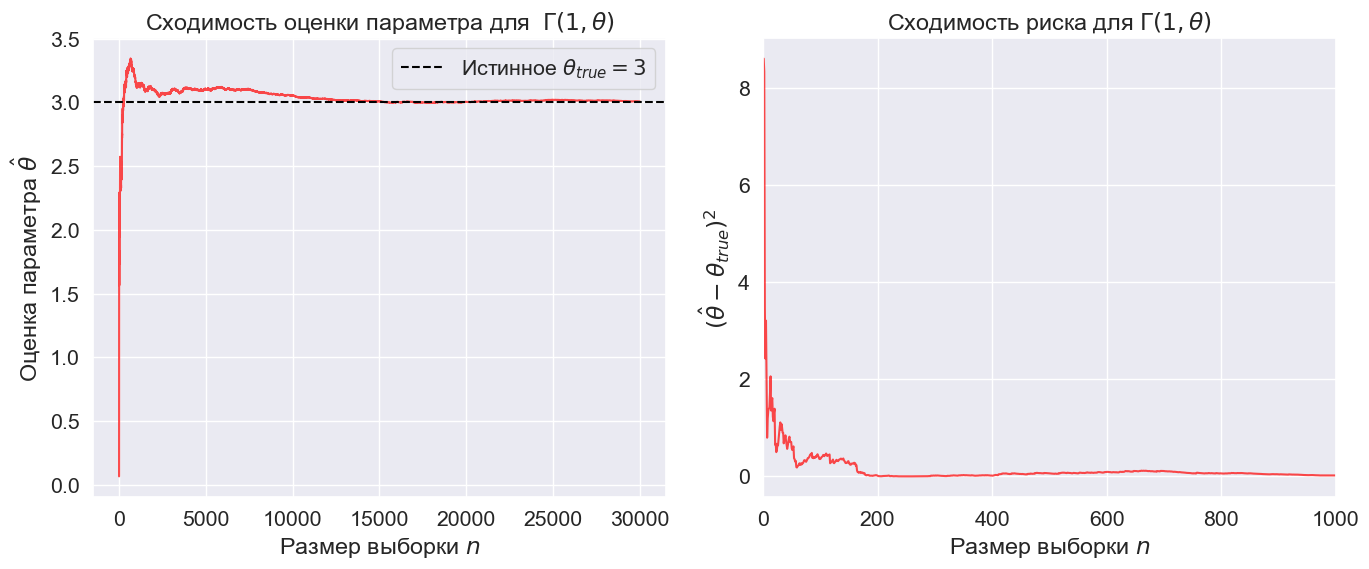

In [26]:
N_1 = 30000
theta = 3

gamma_sample_1 = sps.gamma(a=1, scale=theta).rvs(size=N_1)

def moment_estimator_gamma_1(data):
    cumulative_mean_1 = np.cumsum(data) / np.arange(1, N_1 + 1)
    return cumulative_mean_1

estimator_gamma_1 = moment_estimator_gamma_1(gamma_sample_1)
risk_gamma_1 = (estimator_gamma_1 - theta)**2

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(np.arange(1, N_1 + 1), estimator_gamma_1, color='red', alpha=0.7)
axes[0].axhline(y=theta, color='black', linestyle='--', label=r'Истинное $\theta_{true} = 3$')
axes[0].set_xlabel(r'Размер выборки $n$')
axes[0].set_ylabel(r'Оценка параметра $\hat{\theta}$')
axes[0].set_title(r'Сходимость оценки параметра для  $\Gamma(1, \theta)$')
axes[0].legend()

axes[1].plot(np.arange(1, N_1 + 1), risk_gamma_1, color='red', alpha=0.7)
axes[1].set_xlabel(r'Размер выборки $n$')
axes[1].set_ylabel(r'$(\hat{\theta} - \theta_{true})^2$')
axes[1].set_title(r'Сходимость риска для $\Gamma(1, \theta)$')
axes[1].set_xlim(0, 1000)

plt.tight_layout()
plt.show()

Теперь сходимость видна лучше. 

2. Есть два замечательных распределения, которые игнорировать никак нельзя. Первое --- $Pareto(k)$ с плотностью $p(x) = kx^{-k-1} I( x \ge 1)$, где $k > 0$. Второе --- $Cauchy(0, \theta)$  с плотностью $p(x) = \frac{\theta}{x^2 + \theta^2}$. Запишите оценки методом моментов для них и проверьте их на состоятельность на практике. Для моделирования возьмите то же значение параметра, что дано выше.

*Подсказка:* внимательно изучите, чему равны моменты каждого из распределений и при каких условиях. Можно ли гарантировать состоятельность полученных оценок каким-то теоретическими фактами?

Решение (аналитический вывод оценок):
1. Распределения Парето $P(\gamma)$ с плотностью $p(x) = kx^{-k-1} I( x \ge 1)$, где $k > 0$.
2. Распределение Коши $C(\theta)$ с плотностью $\frac{\theta}{\pi \, (x^2 + \theta^2)}.$

Решение

1. Возьмем пробную функцию $g(x) = x$. Тогда при $k > 1$ у нас получается: 

$E_{k} X_1 = \int_1^{+\infty} x \, kx^{-k - 1} \, dx = -\frac{k}{(-k + 1) x^{-k + 1}} \Big|_1^{+\infty} = \frac{k}{1 - k}.$

Но при $k \in (0,1]$ получаем, что $E_k X_1 = +\infty$. То есть используя пробную функцию $g(x) = x$ мы не сможем найти оценку для всех значений $k$.

Возьмем другую пробную функцию: $g(x) = \ln x$.

$E_{k} \ln X_1 = \int_{1}^{+\infty} \ln x \cdot \frac{k}{x^{k + 1}} \, dx = \int_{1}^{+\infty} \ln x \cdot \left( - \frac{1}{x^{k}} \right)' \, dx = \left. \ln x \cdot \left( - \frac{1}{x^{k}} \right) \right|_{1}^{+\infty} + \int_{1}^{+\infty} \frac{dx}{x^{k}} = 0 + \left. -\frac{x^{-k}}{k} \right|_{1}^{+\infty} = \frac{1}{k} \quad \forall k > 0.$

Тогда по методу моментов: $\ln \bar{X} = \frac{1}{k}; \quad \hat{k} = \frac{1}{\ln \bar{X}}.$

2. Если брать пробные функции вида $g(x) = x^n$, то интегралы будут расходиться, то есть конечных моментов вида $E_{\theta}X^n, n\in N$ у распределения Коши не бывает. Пробную функцию нужно искать среди ограниченных функций от X, например, $\cos x$. 

Характеристическая функция распределения Коши имеет вид: $\varphi_X(t) = E_{\theta}e^{itX} = e^{-\theta |t|}.$ Так как $\cos(X) = \operatorname{Re}(e^{iX})$, то подставляя $t = i$ в характеристическую функцию, получаем: $E_{\theta}e^{iX} = e^{-\theta}.$

По методу моментов получаем: $\hat{\theta} = -\ln \overline{\cos(x)}$.

По поводу состоятельности можно сказать следующее: функции оценок непрерывны везде, кроме 0 (в 0 вероятность 0 и к тому же в 0 функцию можно доопределить), значит, состоятельность сохраняется и оценки будут состоятельными. 



Моделирование:

C:\Users\natas\AppData\Local\Temp\ipykernel_15044\3538691869.py:20: RuntimeWarning: invalid value encountered in log
  return -np.log(cumulative_cos_mean)


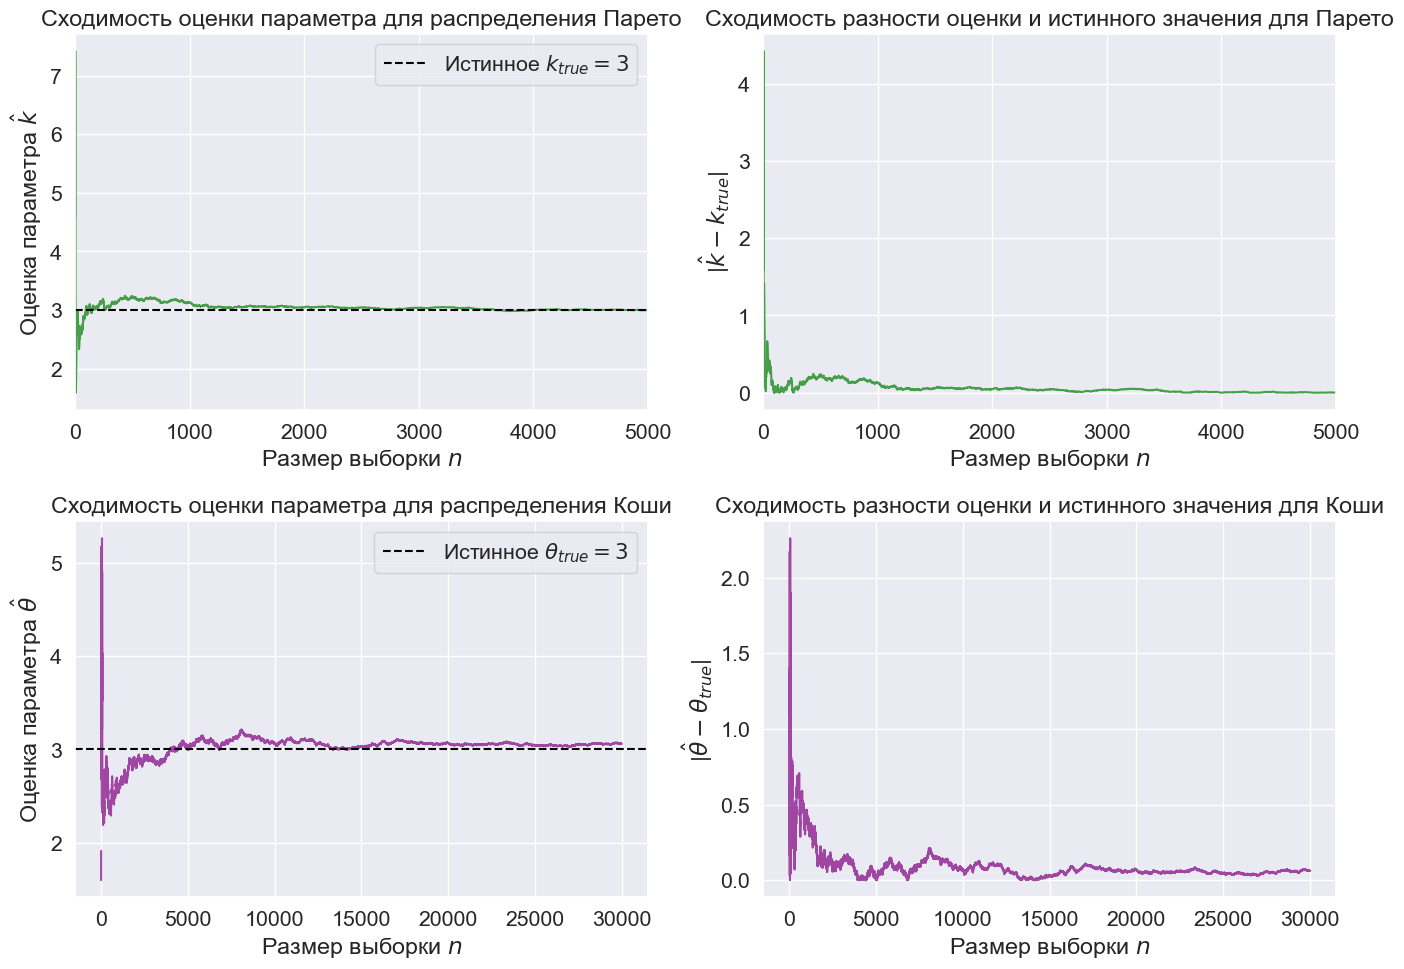

In [46]:
N = 30000
theta = 3 

pareto_sample = sps.pareto(theta).rvs(size=N)
cauchy_sample = sps.cauchy(scale=theta).rvs(size=N)

def moment_estimator_pareto(data):
    cumulative_log_mean = np.cumsum(np.log(data)) / np.arange(1, N + 1)
    return 1 / cumulative_log_mean

def moment_estimator_cauchy(data):
    cumulative_cos_mean = np.cumsum(np.cos(data)) / np.arange(1, N + 1)
    return -np.log(cumulative_cos_mean)

estimator_pareto = moment_estimator_pareto(pareto_sample)
estimator_cauchy = moment_estimator_cauchy(cauchy_sample)

difference_pareto = np.abs(estimator_pareto - theta)
difference_cauchy = np.abs(estimator_cauchy - theta)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].plot(np.arange(1, N + 1), estimator_pareto, color='green', alpha=0.7)
axes[0, 0].axhline(y=theta, color='black', linestyle='--', label=r'Истинное $k_{true} = 3$')
axes[0, 0].set_xlabel(r'Размер выборки $n$')
axes[0, 0].set_ylabel(r'Оценка параметра $\hat{k}$')
axes[0, 0].set_title(r'Сходимость оценки параметра для распределения Парето')
axes[0, 0].legend()
axes[0, 0].set_xlim(0, 5000)

axes[0, 1].plot(np.arange(1, N + 1), difference_pareto, color='green', alpha=0.7)
axes[0, 1].set_xlabel(r'Размер выборки $n$')
axes[0, 1].set_ylabel(r'|$\hat{k} - k_{true}$|')
axes[0, 1].set_title(r'Сходимость разности оценки и истинного значения для Парето')
axes[0, 1].set_xlim(0, 5000)

axes[1, 0].plot(np.arange(1, N + 1), estimator_cauchy, color='purple', alpha=0.7)
axes[1, 0].axhline(y=theta, color='black', linestyle='--', label=r'Истинное $\theta_{true} = 3$')
axes[1, 0].set_xlabel(r'Размер выборки $n$')
axes[1, 0].set_ylabel(r'Оценка параметра $\hat{\theta}$')
axes[1, 0].set_title(r'Сходимость оценки параметра для распределения Коши')
axes[1, 0].legend()

axes[1, 1].plot(np.arange(1, N + 1), difference_cauchy, color='purple', alpha=0.7)
axes[1, 1].set_xlabel(r'Размер выборки $n$')
axes[1, 1].set_ylabel(r'|$\hat{\theta} - \theta_{true}$|')
axes[1, 1].set_title(r'Сходимость разности оценки и истинного значения для Коши')


plt.tight_layout()
plt.show()


Для состоятельности я рассмотрела сходимость величины |$\hat{\theta} - \theta_{true}$| к нулю (как по определению, но только взяла 0 вместо очень маленького $\epsilon$).
Я также решила, что N=1000 это слишком мало, чтобы увидеть на графиках сходимость, поэтому я взяла N=30000 и ограничила по оси x графики для Парето распределения (для них выбранное N слишком большое, достаточно 5000). Для распределения Коши, в зависимости от выборки, сходимость будет видна хорошо или не так хорошо, но в целом, можно сделать вывод, что она есть. По графикам видно, что N=1000 точно бы не хватило.

**Вывод:** В этой задаче я аналитически вывела оценки по методу моментов для пяти распределений. Для первых трех я также рассмотрела сходимость риска к 0, для последних двух я смоделировала состоятельность. Как вывод, могу сказать, что заданного N не всегда хватает, чтобы точно "глазами" увидеть сходимость. Поэтому в некоторых пунктах я брала N большее, чем в условии. Так же могу сказать, что то, насколько хорошо видна сходимость, зависит также от выборки. 

**Следующие две задачи посвящены тому, как получать более информативные оценки, чем точечные. Нам приходится обращаться к ним, так как свойства точечных оценок являются предельными, и мы мало что знаем о том, насколько конкретное значение оценки близко к истинному значению параметра. В условиях кровавой войны информация должна быть максимальной.**

### Задача 4. Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка) и какой-то отрезок, в который параметр попадёт с высокой вероятностью (такой отрезок называется **доверительным интервалом**_. На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Вспомним, как работает **метод подстановки** для получения оценок. В нём мы выражаем параметр при помощи распределения (как среднее или медиана, например), потом меняем распределение на эмпирическое и выражаем параметр уже через него. Бутстреп это подмена истинного распределения на эмпирическое.



1. Для каждого распределения из задачи 3 (в том числе из пункта 2) сгенерируйте выборку размера $N = 1000$. Далее замените Ваше распределение на равномерное распределение по построенной выборке (по теореме Гливенко-Кантелли эти распределения достаточно близки), и из эмпирического (равномерного) распределения постройте 100 выборок. Опишите, как Вы будете это делать.

*Указание:* из истинного распределения (нормального и т.д.) новые данные генерировать **нельзя**. Бутстреп это способ получения псевдо-новых данных из уже имеющихся.

Ответ: Вначале я сгенерировала выборки для каждого распределения из номера 3, каждая размером N=1000, затем я использую каждую выборку как эмперическое распределение,  и затем я из каждого эмпирического распределения строю 100 выборок. Чтобы создать 100 новых выборок, я сэмплирую с возвращением из эмпирической выборки, каждая новая выборка также имеет размер N=1000.

In [49]:
import numpy as np
import scipy.stats as sps

N = 1000
theta = 3

norm_sample = sps.norm(scale=np.sqrt(theta)).rvs(size=N)
uniform_sample = sps.uniform(loc=0, scale=theta).rvs(size=N)
gamma_sample = sps.gamma(a=1, scale=theta).rvs(size=N)
pareto_sample = sps.pareto(theta).rvs(size=N) 
cauchy_sample = sps.cauchy(scale=theta).rvs(size=N)

def generate_bootstrap_samples(data, n_bootstrap=100):
    bootstrap_samples = []
    for i in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_samples.append(bootstrap_sample)
    return bootstrap_samples

bootstrap_samples_normal = generate_bootstrap_samples(norm_sample)
bootstrap_samples_uniform = generate_bootstrap_samples(uniform_sample)
bootstrap_samples_gamma = generate_bootstrap_samples(gamma_sample)
bootstrap_samples_pareto = generate_bootstrap_samples(pareto_sample)
bootstrap_samples_cauchy = generate_bootstrap_samples(cauchy_sample)


2. Для каждой псевдо-выборки из предыдущего пункта постройте оценку методом моментов из задачи 3: получится выборка оценок (как в домашке 1). По ней посчитайте эмпирическую (выборочную) дисперсию оценок и сделайте вывод о том, как связано значение дисперсии оценки (эмпирической и бутстрепной) с точностью и скоростью сходимости оценки к параметру.

In [56]:
bootstrap_estimates_normal = [moment_estimator_normal(sample) for sample in bootstrap_samples_normal]
bootstrap_estimates_uniform = [moment_estimator_uniform(sample) for sample in bootstrap_samples_uniform]
bootstrap_estimates_gamma = [moment_estimator_gamma(sample) for sample in bootstrap_samples_gamma]
bootstrap_estimates_pareto = [moment_estimator_pareto(sample) for sample in bootstrap_samples_pareto]
bootstrap_estimates_cauchy = [moment_estimator_cauchy(sample) for sample in bootstrap_samples_cauchy]

bootstrap_var_normal = np.nanvar(bootstrap_estimates_normal, ddof=1)
bootstrap_var_uniform = np.nanvar(bootstrap_estimates_uniform, ddof=1)
bootstrap_var_gamma = np.nanvar(bootstrap_estimates_gamma, ddof=1)
bootstrap_var_pareto = np.nanvar(bootstrap_estimates_pareto, ddof=1)
bootstrap_var_cauchy = np.nanvar(bootstrap_estimates_cauchy, ddof=1)

print("Дисперсия бутстрепных оценок:")
print("Нормальное распределение:", bootstrap_var_normal)
print("Равномерное распределение:", bootstrap_var_uniform)
print("Гамма распределение:", bootstrap_var_gamma)
print("Распределение Парето:", bootstrap_var_pareto)
print("Распределение Коши:", bootstrap_var_cauchy)

Дисперсия бутстрепных оценок:
Нормальное распределение: 0.10074101612480847
Равномерное распределение: 0.024189327815121408
Гамма распределение: 0.06935451215825694
Распределение Парето: 2.9618073442445425
Распределение Коши: 0.8914895746995407


C:\Users\natas\AppData\Local\Temp\ipykernel_15044\4182471507.py:6: RuntimeWarning: invalid value encountered in divide
  cumulative_var = np.cumsum((data - np.cumsum(data) / (1 + np.arange(N)))**2) / (np.arange(1, N + 1) - 1)
C:\Users\natas\AppData\Local\Temp\ipykernel_15044\3538691869.py:20: RuntimeWarning: invalid value encountered in log
  return -np.log(cumulative_cos_mean)


Я вывела дисперсии для бутстрепных выборок. Рассматривая по отдельности дисперсии для каждого распределения, хочется сказать, что значительно выделяется только оценка для Парето распределения (2.961), у остальных распределений оценки дисперсии достаточно низкие. Так как бутстрепная дисперсия показывает, насколько сильно изменяется оценка при изменении выборки, кажется, что для всех распределений, кроме Парето, оцени не будут сильно меняться (при изменении выборки).

3. Как мы знаем, оценка методом моментов не гарантирует несмещённости. При помощи метода бутстрапирования найдите смещение (разницу между мат. ожиданием оценки и значением параметра) каждой оценки. Какие оценки (в теории) несмещённые?

In [63]:
# Вычисление бутстрепных оценок и расчёт смещения для каждой оценки
def calculate_bias(bootstrap_samples, true_value, estimator):
    bootstrap_estimates = [estimator(sample) for sample in bootstrap_samples]
    mean_estimate = np.nanmean(bootstrap_estimates)  # Среднее значение, игнорирующее NaN
    bias = mean_estimate - true_value
    return bias

# Расчёт смещений
bias_normal = calculate_bias(bootstrap_samples_normal, theta, moment_estimator_normal)
bias_uniform = calculate_bias(bootstrap_samples_uniform, theta, moment_estimator_uniform)
bias_gamma = calculate_bias(bootstrap_samples_gamma, theta, moment_estimator_gamma)
bias_pareto = calculate_bias(bootstrap_samples_pareto, theta, moment_estimator_pareto)
bias_cauchy = calculate_bias(bootstrap_samples_cauchy, theta, moment_estimator_cauchy)

# Вывод смещений
print("Смещение оценок для различных распределений:")
print(f"Нормальное распределение: {bias_normal}")
print(f"Равномерное распределение: {bias_uniform}")
print(f"Гамма распределение: {bias_gamma}")
print(f"Распределение Парето: {bias_pareto}")
print(f"Распределение Коши: {bias_cauchy}")

Смещение оценок для различных распределений:
Нормальное распределение: -0.3207381617784488
Равномерное распределение: -0.04930384301682489
Гамма распределение: -0.10756734647965871
Распределение Парето: -0.08890940189292618
Распределение Коши: 0.2577400179283327


C:\Users\natas\AppData\Local\Temp\ipykernel_15044\4182471507.py:6: RuntimeWarning: invalid value encountered in divide
  cumulative_var = np.cumsum((data - np.cumsum(data) / (1 + np.arange(N)))**2) / (np.arange(1, N + 1) - 1)
C:\Users\natas\AppData\Local\Temp\ipykernel_15044\3538691869.py:20: RuntimeWarning: invalid value encountered in log
  return -np.log(cumulative_cos_mean)


В теории, первые три оценки должны быть несмещенными. В функции оценок (через моменты) я более-менее уверена, значит, проблема либо в моделировании бутсрепных выборок, либо в самих выборках. Вообще, смещение не очень большое, но оно есть, поэтому в чем-то прокол. Но кажется, что смещение равномерного распределения и распределения Парето очень маленькие, поэтому хотелось бы сказать, что эти оценки несмещенные, но это тоже не совпадает с теорией, поэтому этот вывод сильно лучше ситуацию не делает. Но как есть.  

**Вывод:**

Я смоделировала бутстрепные выборки, для них посчитала оценки дисперсии и смещения. Смещения не совпали с теоретическими. 

### Задача 5. Байес.

**Эта задача является бонусной и стоит 30 (!!!) баллов**

Байесовское оценивание даёт ультиматимативный способ построения оценок без какой-либо потери в информации. Теперь мы оцениваем параметры распределения не точками и не отрезками, а распределениями!

1. Будем смотреть на параметрическое семейство распределений как на условное распределение: $P_{\theta} = P(X | \theta)$. В байесовском подходе подразумевается, что параметр $\theta$ сам приходит из некоторого **априорного** распределения (которое статист либо предпологает сам, либо предпологает исходя из внешних знаний об области).

Вспомним теорему Байеса: $p(\theta | X) = \frac{p(X | \theta) p(\theta)}{p(X)}$, где знаменатель $p(x)$ получается как интеграл по $\theta$ от числителя. В зависимости от того, можем ли мы взять этот интеграл, выбирается тип байесовской оценки. $p(X | \theta)$ мы знаем, это хорошо нам знакомое правдоподобие, $p(\theta)$ называется априорным распределением (prior) параметра, мы его выбираем сами исходя из наших предпочтений, $p(X)$ от параметра не зависит и называется обоснованностью (evidence), и показывает, насколько правдоподобна выборка в терминах выбранного семейства распределений.

Скачайте датасет сердечных заболеваний: https://colab.research.google.com/drive/1J5ujdgEDwLhie13d4XDd3manrNe_c3Ek#scrollTo=vd8WgXL3jjzL

Мы будем предсказывать наличие и степень выраженности болезни (переменная num) это наличие, используя следующие параметры: age, sex, fbs, chol

Переменная num имеет категориальное распределение. Напишите его плотность и докажите, что сопряжённым к нему будет распределение Дирихле https://en.wikipedia.org/wiki/Dirichlet_distribution.

Доказательство:

Пока что мы работаем в модели, которая не учитывает никаких параметров и рассматриваем весь датасет как единую выборку индикаторов степени выраженности болезни (num).

2. "Байес для бедных" (Poor man's bayes)

Пусть интеграл в знаменателе мы считать не умеем и мы готовы с этим смириться. Что в таком случае делать? Можно искать моду (максимум) апостериорной плотности $P(\theta | X)$, где $X$ --- выборка, и рассматривать оценку $\theta$ как точку максимума.

Подберите три различных априорных распределения на параметр (т.е. три разных набора параметров априорного распределения Дирихле) и найдите максимум апостериорной плотности.
Преобразуйте задачу максимизации и найдите максимум по сетке или оптимизатором.

Сделайте вывод о том, как влияет априорная информация о параметре на оценку? Вспомните лекции из курса машинного обучения. На какой объект похоже априорное распределение? Как его следует выбирать. Как связаны максимум апостериорной плотности и оценка максимального правоподобия?

Ответ:

Вы --- врач и оценка вероятности $\mathsf P(num=0)$ оказывается больше, чем 0.3, то Вы отправите пациента на доп. обследование и возможно на лечение. Как лучше подобрать априорное распределение, чтобы оценке байеса для бедных можно было доверять. Почему вообще одни априорные параметры могут быть лучше других?

Ответ:

Подберите такой порог $P(num = 0)$ при котором пациент отправляется на доп. обследование и два таких набора априорных параметров, при которых для данной выборки порог достигается и не достигается.

Сделайте вывод о выборе априорного распределения.

3. Байес для богатых (обычный байес).

Отказываться считать интеграл нельзя, за это полагается смертная казнь.

Посчитайте и визуализируйте апостериорные плотности для разных априорных параметров. Если плотность оказывается слишком похожа на дельта-функцию, считайте её не для всей выборки

Что Вы бы брали точечной оценкой параметра исходя из апостериорного распределения? Почему?

4. Выбор модели.

Рассмотрим несколько моделей предсказания сердечных заболеваний. Модели будут очень простыми --- у нас будет разный параметр вероятности для разных групп пациентов. Предложите 4-5 разбиений пациентов на группы (по полу/возрасту/каким-то порогам на количество сахара или холестерина в крови) и рассмотрите модели, при которых параметры категориального распределения оказываются разными или одинаковыми для разных групп. Посмотрите на пример с семинара. Посчитайте обоснованность в каждом случае.

**Указание:** не считайте интеграл, так как обоснованностью будет произведение комбинаторных коэффициентов и бета-функций.

**Указание:** При сравнении обоснованности для модели, которая учитывает разбиение на группы с той, которая не учитывает, плотность всё равно следует факторизовать на группы, чтобы анализ был одинаковым.

Например, для сравнения модели "параметр зависит от возраста" и "параметр зависит от пола" необходимо разделить данные на 4 группы "молодые/старые мужчины/женщины". См. пример с семинара.

Предполагая возможнность модели "параметр зависит от пола" мы делаем неявное предположение, что данные для разных полов приходят из разных совокупностей, а значит их нельзя объединять в одну выборку. Осторожно формулируйте, в каких предположениях Вы сравниваете модели.

У какой модели выше обоснованность? Почему?

Сделайте вывод о байесовском оценивании: